In [3]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [7]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0])

In [12]:
Prior = np.vectorize(Prior)

In [11]:
Prior(0.5)

array(1.)

In [13]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [16]:
Likelihood(0.5,4,10)

0.0009765625

In [17]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [18]:
# EL mundo de los modelos
p = np.linspace(0,1,100)
r = 4
n = 10
Pos = Posterior(p,r,n)

<IPython.core.display.Javascript object>


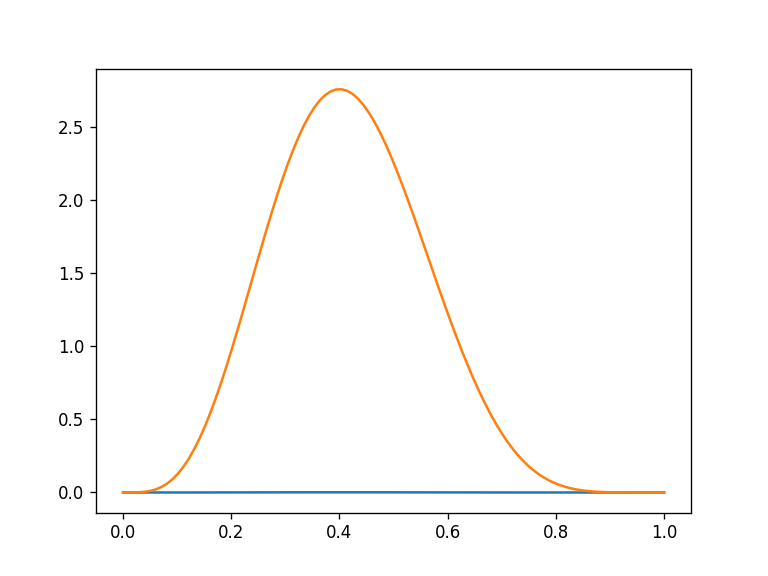

In [19]:
plt.plot(p,Pos)

In [21]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.00043290043290043285

<IPython.core.display.Javascript object>


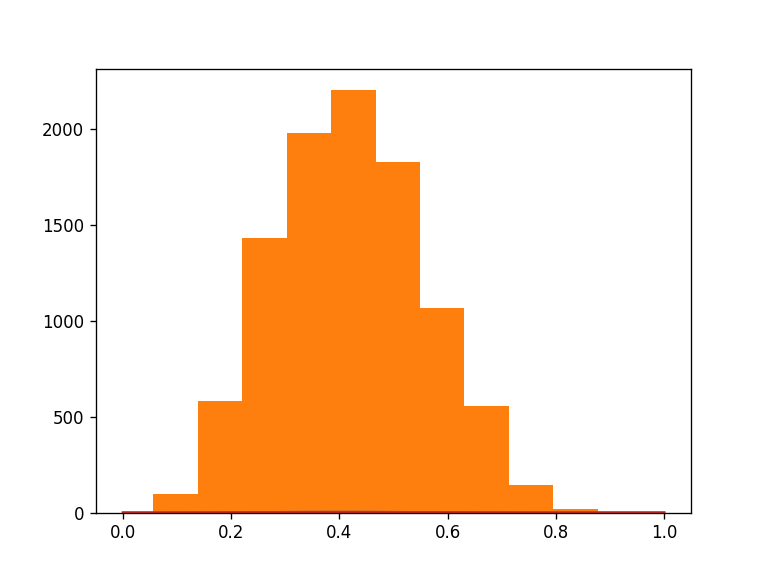

In [23]:
plt.plot(p,Pos/I)

In [50]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [51]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|█████████████████████████████████████████████████████████| 9999/9999 [00:04<00:00, 2242.66it/s]


<IPython.core.display.Javascript object>


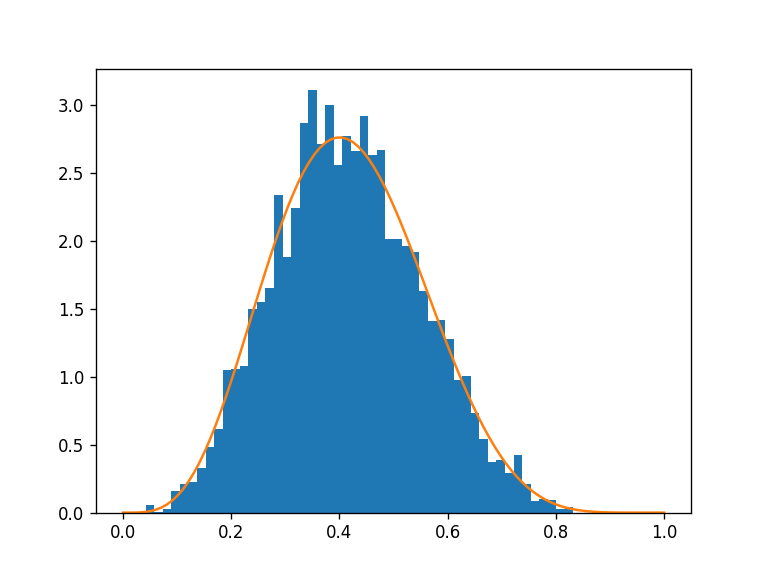

In [52]:
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos/I)

In [54]:
liminf = np.percentile(MCMC,16)
liminf

0.2797333229213024

In [55]:
limsum = np.percentile(MCMC,84)
limsum

0.5562270457161551

In [56]:
mediana = np.percentile(MCMC,50)
mediana

0.41053355161089644

$$  \hat{p} = 0.55_{0.28}^{0.14} at 68\% CL $$

In [57]:
upperlimit = np.percentile(MCMC,95) 

In [58]:
upperlimit

0.6442318234352826